**Exercise 1a:**

In [1]:
import requests
import time
import io #how to process incoming data slightly different than before

from rdkit import Chem
from rdkit.Chem import Draw

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
query = "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
mydata = {'smiles': query}
options = ['same_connectivity', 'same_isotope']
proinput = 'compound/fastidentity/smiles'
output = 'csv?identity_type='

#### Identity_type: same_connectivity
9568614 "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
Esomeprazole, 
(S)-Omeprazole, 
(-)-Omeprazole, 
(S)-(-)-Omeprazole, 
119141-88-7, 
4594 "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
Losec, 
9579578 "CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
(r)-omeprazole, 
119141-89-8, 
Esomeprazole, 
(+)-omeprazole, 
UNII-S51HU491WJ, 
16111637 "[2H]C1=C(C(=C(C(=N1)C([2H])([2H])S(=O)C2=NC3=C(N2)C=C(C=C3)OC([2H])([2H])[2H])C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H]"
SCHEMBL13645431, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
44200396 "[2H]C1=C(C(=C(C(=N1)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC([2H])([2H])[2H])C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H]"
SCHEMBL13411612, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
45040154 "[2H]C([2H])([2H])OC1=CC2=C(C=C1)N=C(N2)S(=O)CC3=NC=C(C(=C3C)OC)C"
Omeprazole D3, 
Omeprazole-d3, 
922731-01-9, 
934293-91-1, 
H 16

SCHEMBL13645304, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
136104623 "[2H]C1=C(C(=C(C2=C1N=C(N2)S(=O)CC3=NC(=C(C(=C3C([2H])([2H])[2H])OC)C([2H])([2H])[2H])[2H])[2H])OC)[2H]"
SCHEMBL13645231, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
136104624 "[2H]C1=C(C(=C(C2=C1N=C(N2)S(=O)C([2H])([2H])C3=NC=C(C(=C3C)OC([2H])([2H])[2H])C)[2H])OC)[2H]"
SCHEMBL13645287, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
136104625 "[2H]C1=C(C(=C(C2=C1N=C(N2)S(=O)C([2H])([2H])C3=NC=C(C(=C3C)OC)C)[2H])OC)[2H]"
SCHEMBL13645286, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
136169381 "[2H]C1=C(C(=C(C2=C1N=C(N2)S(=O)CC3=NC(=C(C(=C3C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H])[2H])[2H])OC([2H])([2H])[2H])[2H]"
SCHEMBL13727940, 
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
136169382 "[2H]C1=C(C(=C(C2=C1N=C(N2)S(=O)C([2H])([2H])C3=NC(=C(C(=C3C([2H])([2H])[2H])OC([2H])([2H])[2H])C([2H])([2H])[2H])[2H])[2H])OC)[2H]"
SCHEMBL13728569, 
omeprazole, 
73590-58-6, 
Prilose

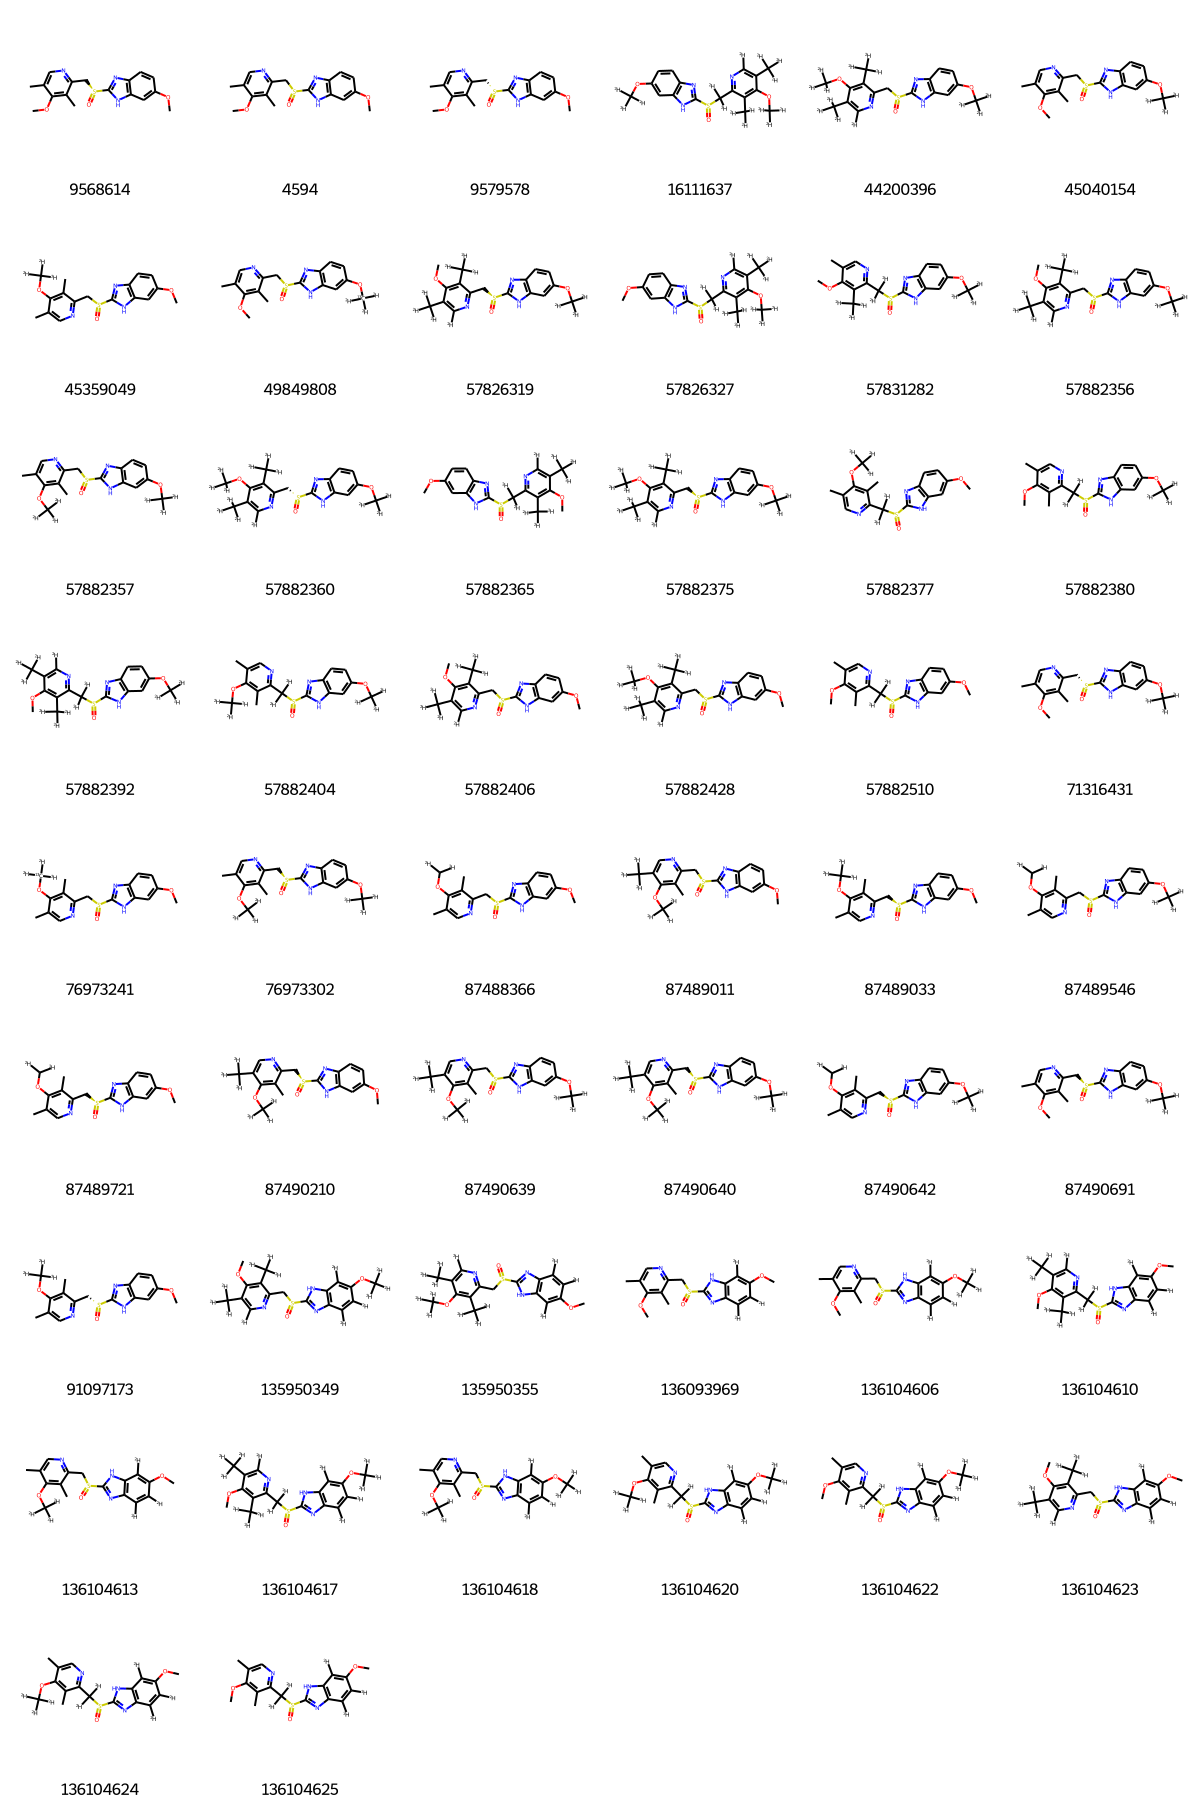

#### Identity_type: same_isotope
9568614 "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
Esomeprazole, 
(S)-Omeprazole, 
(-)-Omeprazole, 
(S)-(-)-Omeprazole, 
119141-88-7, 
4594 "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
omeprazole, 
73590-58-6, 
Prilosec, 
Esomeprazole, 
Losec, 
9579578 "CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
(r)-omeprazole, 
119141-89-8, 
Esomeprazole, 
(+)-omeprazole, 
UNII-S51HU491WJ, 


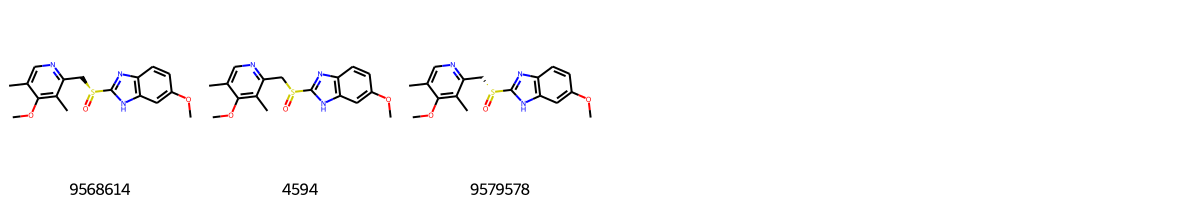

In [17]:
for myoption in (options):
    
    print("#### Identity_type:", myoption)
    
    url = prolog + '/' + proinput + '/'  + 'property/isomericsmiles' + '/' + output + myoption
    res = requests.post (url, data=mydata)
    
    mysmiles = []
    mycids = []
            
    file = io.StringIO(res.text)
    file.readline()

    for line in file:
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        url = prolog + '/' + 'compound/fastidentity/cid/'+ cid_tmp + '/synonyms/txt?identity_type=' + myoption
        res1 = requests.post (url, data=mydata)
            
        ls_syn = res1.text.split('\n')
        for x in range(5): print(ls_syn[x], end = ', \n')
        
        mycids.append(cid_tmp)
        mysmiles.append(smiles_tmp.replace('"',""))

    mols = []
        
    for x in mysmiles:
            
        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)
        mols.append(mol)
    img = Draw.MolsToGridImage(mols, molsPerRow = 6, subImgSize =(200,200), legends=mycids)
    display(img)
        
    time.sleep(0.2)

**Exercise 2a:**

In [90]:
query = '[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C'
mydata = { 'smiles' : query}

url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=80"
res = requests.post(url,data=mydata)
cids = res.text.split()
cids.sort(reverse=False)

print("Number of CIDs:", len(cids))


for x in cids:
    
    url = prolog + "/compound/cid/" + x + "/aids/txt?cids_type=active"
    res1 = requests.get(url)
    
    aids = res1.text.split()
    aids.sort(reverse=False)
    
    if aids[0] != '404':
 
        for i in aids:
            #if aids[0] != '404':
            url = prolog + "/assay/aid/" + i + "/targets/GeneSymbol/txt"
            res2 = requests.get(url)
            genesymbol = res2.text.split()
            if genesymbol[0] != "Status:":print("#For CID:", x, "\n##AID:", i, "\n###Gene Symbol:",genesymbol)


Number of CIDs: 2767
#For CID: 10402561 
##AID: 1696523 
###Gene Symbol: ['SULT1E1']
#For CID: 10664197 
##AID: 161087 
###Gene Symbol: ['Ptafr']
#For CID: 11561040 
##AID: 270608 
###Gene Symbol: ['OPRK1']
#For CID: 11561040 
##AID: 270609 
###Gene Symbol: ['OPRK1']
#For CID: 11561040 
##AID: 270610 
###Gene Symbol: ['OPRK1']
#For CID: 11561040 
##AID: 329899 
###Gene Symbol: ['OPRM1']
#For CID: 11561040 
##AID: 329900 
###Gene Symbol: ['OPRD1']
#For CID: 11561040 
##AID: 329901 
###Gene Symbol: ['OPRK1']
#For CID: 11561040 
##AID: 329904 
###Gene Symbol: ['OPRM1']
#For CID: 11561040 
##AID: 329905 
###Gene Symbol: ['OPRM1']
#For CID: 11561040 
##AID: 329906 
###Gene Symbol: ['OPRK1']
#For CID: 11561040 
##AID: 329907 
###Gene Symbol: ['OPRK1']
#For CID: 11869599 
##AID: 1256912 
###Gene Symbol: ['IDH1']
#For CID: 11869599 
##AID: 1256913 
###Gene Symbol: ['IDH1']
#For CID: 122183565 
##AID: 1236838 
###Gene Symbol: ['ANPEP']
#For CID: 122183565 
##AID: 1236848 
###Gene Symbol: ['LAP3

#For CID: 24747419 
##AID: 1511 
###Gene Symbol: ['KCNH2']
#For CID: 24747419 
##AID: 1529 
###Gene Symbol: ['MAP3K3']
#For CID: 24747419 
##AID: 1530 
###Gene Symbol: ['MAP4K2']
#For CID: 24747419 
##AID: 1531 
###Gene Symbol: ['MAP4K2']
#For CID: 24747419 
##AID: 1565 
###Gene Symbol: ['PHOSPHO1']
#For CID: 24747419 
##AID: 1566 
###Gene Symbol: ['NOD2']
#For CID: 24747419 
##AID: 1578 
###Gene Symbol: ['NOD1']
#For CID: 24747419 
##AID: 1654 
###Gene Symbol: ['DUSP3']
#For CID: 24747419 
##AID: 1671190 
###Gene Symbol: ['ALOX12']
#For CID: 24747419 
##AID: 1672 
###Gene Symbol: ['Kcnj2']
#For CID: 24747419 
##AID: 1700 
###Gene Symbol: ['KLF5']
#For CID: 24747419 
##AID: 1766 
###Gene Symbol: ['MEN1', 'KMT2A']
#For CID: 24747419 
##AID: 1768 
###Gene Symbol: ['MEN1', 'KMT2A']
#For CID: 24747419 
##AID: 1777 
###Gene Symbol: ['OPRK1']
#For CID: 24747419 
##AID: 1778 
###Gene Symbol: ['OPRK1']
#For CID: 24747419 
##AID: 1779 
###Gene Symbol: ['PTPN22']
#For CID: 24747419 
##AID: 1789 

#For CID: 24747419 
##AID: 493160 
###Gene Symbol: ['HKDC1']
#For CID: 24747419 
##AID: 493187 
###Gene Symbol: ['HKDC1']
#For CID: 24747419 
##AID: 493244 
###Gene Symbol: ['TNNC1', 'TNNI3', 'TNNT2', 'TPM1']
#For CID: 24747419 
##AID: 504326 
###Gene Symbol: ['OPRD1', 'OPRM1']
#For CID: 24747419 
##AID: 504327 
###Gene Symbol: ['KAT2A']
#For CID: 24747419 
##AID: 504329 
###Gene Symbol: ['NS1']
#For CID: 24747419 
##AID: 504333 
###Gene Symbol: ['BAZ2B']
#For CID: 24747419 
##AID: 504357 
###Gene Symbol: ['OPRD1', 'OPRM1']
#For CID: 24747419 
##AID: 504406 
###Gene Symbol: ['glf']
#For CID: 24747419 
##AID: 504411 
###Gene Symbol: ['DAGLB']
#For CID: 24747419 
##AID: 504414 
###Gene Symbol: ['CFTR', 'GOPC']
#For CID: 24747419 
##AID: 504441 
###Gene Symbol: ['Dyrk1a']
#For CID: 24747419 
##AID: 504444 
###Gene Symbol: ['NFE2L2']
#For CID: 24747419 
##AID: 504454 
###Gene Symbol: ['ADRB2']
#For CID: 24747419 
##AID: 504462 
###Gene Symbol: ['ATG4B']
#For CID: 24747419 
##AID: 504466 
#

#For CID: 24747419 
##AID: 624415 
###Gene Symbol: ['MCOLN1']
#For CID: 24747419 
##AID: 624416 
###Gene Symbol: ['env']
#For CID: 24747419 
##AID: 624417 
###Gene Symbol: ['GLP1R']
#For CID: 24747419 
##AID: 624463 
###Gene Symbol: ['DRD2']
#For CID: 24747419 
##AID: 624464 
###Gene Symbol: ['DRD2']
#For CID: 24747419 
##AID: 624465 
###Gene Symbol: ['DRD2']
#For CID: 24747419 
##AID: 624466 
###Gene Symbol: ['TAAR1']
#For CID: 24747419 
##AID: 624467 
###Gene Symbol: ['TAAR1']
#For CID: 24747419 
##AID: 651550 
###Gene Symbol: ['AKT1']
#For CID: 24747419 
##AID: 651560 
###Gene Symbol: ['ACP1']
#For CID: 24747419 
##AID: 651572 
###Gene Symbol: ['Arfgap1']
#For CID: 24747419 
##AID: 651602 
###Gene Symbol: ['recB', 'recD', 'recC']
#For CID: 24747419 
##AID: 651635 
###Gene Symbol: ['ATXN2']
#For CID: 24747419 
##AID: 651636 
###Gene Symbol: ['GPR183']
#For CID: 24747419 
##AID: 651644 
###Gene Symbol: ['vpr']
#For CID: 24747419 
##AID: 651647 
###Gene Symbol: ['MMP14']
#For CID: 2474

#For CID: 2771861 
##AID: 1430 
###Gene Symbol: ['Tb10.70.5800']
#For CID: 2771861 
##AID: 1434 
###Gene Symbol: ['RUNX1', 'CBFB']
#For CID: 2771861 
##AID: 1439 
###Gene Symbol: ['GNAO1', 'RGS7']
#For CID: 2771861 
##AID: 1440 
###Gene Symbol: ['GNAO1', 'RGS19']
#For CID: 2771861 
##AID: 1441 
###Gene Symbol: ['GNAO1', 'RGS16']
#For CID: 2771861 
##AID: 1443 
###Gene Symbol: ['TNFSF10']
#For CID: 2771861 
##AID: 1445 
###Gene Symbol: ['PF3D7_1311800']
#For CID: 2771861 
##AID: 1446 
###Gene Symbol: ['JAK2']
#For CID: 2771861 
##AID: 1448 
###Gene Symbol: ['MCOLN3']
#For CID: 2771861 
##AID: 1452 
###Gene Symbol: ['ALOX12']
#For CID: 2771861 
##AID: 1456 
###Gene Symbol: ['SLC12A5']
#For CID: 2771861 
##AID: 1457 
###Gene Symbol: ['Impa1']
#For CID: 2771861 
##AID: 1458 
###Gene Symbol: ['SMN2']
#For CID: 2771861 
##AID: 1460 
###Gene Symbol: ['MAPT']
#For CID: 2771861 
##AID: 1461 
###Gene Symbol: ['NPSR1']
#For CID: 2771861 
##AID: 1466 
###Gene Symbol: ['GAA']
#For CID: 2771861 
##A

#For CID: 2771861 
##AID: 434971 
###Gene Symbol: ['Alpi']
#For CID: 2771861 
##AID: 434973 
###Gene Symbol: ['SENP7']
#For CID: 2771861 
##AID: 434989 
###Gene Symbol: ['HCRTR1']
#For CID: 2771861 
##AID: 436 
###Gene Symbol: ['BAP1']
#For CID: 2771861 
##AID: 445 
###Gene Symbol: ['NFKBIA']
#For CID: 2771861 
##AID: 449 
###Gene Symbol: ['S1PR1']
#For CID: 2771861 
##AID: 453 
###Gene Symbol: ['CTSB']
#For CID: 2771861 
##AID: 460 
###Gene Symbol: ['CTSL']
#For CID: 2771861 
##AID: 463082 
###Gene Symbol: ['PLA2G7']
#For CID: 2771861 
##AID: 463111 
###Gene Symbol: ['RGS4']
#For CID: 2771861 
##AID: 463115 
###Gene Symbol: ['FURIN']
#For CID: 2771861 
##AID: 463141 
###Gene Symbol: ['CASP3']
#For CID: 2771861 
##AID: 463165 
###Gene Symbol: ['RGS4']
#For CID: 2771861 
##AID: 463190 
###Gene Symbol: ['TIM10']
#For CID: 2771861 
##AID: 463193 
###Gene Symbol: ['MAP1LC3A']
#For CID: 2771861 
##AID: 463195 
###Gene Symbol: ['TIM10']
#For CID: 2771861 
##AID: 463212 
###Gene Symbol: ['TIM

#For CID: 2771861 
##AID: 588413 
###Gene Symbol: ['Gli1']
#For CID: 2771861 
##AID: 588453 
###Gene Symbol: ['Txnrd1']
#For CID: 2771861 
##AID: 588456 
###Gene Symbol: ['Txnrd1']
#For CID: 2771861 
##AID: 588458 
###Gene Symbol: ['DNMT1']
#For CID: 2771861 
##AID: 588473 
###Gene Symbol: ['CRHBP', 'CRHR2']
#For CID: 2771861 
##AID: 588475 
###Gene Symbol: ['CRHBP', 'CRHR2']
#For CID: 2771861 
##AID: 588478 
###Gene Symbol: ['UCHL5']
#For CID: 2771861 
##AID: 588489 
###Gene Symbol: ['PABPC1']
#For CID: 2771861 
##AID: 588493 
###Gene Symbol: ['PSMD14']
#For CID: 2771861 
##AID: 588511 
###Gene Symbol: ['Ano1']
#For CID: 2771861 
##AID: 588579 
###Gene Symbol: ['POLK']
#For CID: 2771861 
##AID: 588590 
###Gene Symbol: ['POLI']
#For CID: 2771861 
##AID: 588591 
###Gene Symbol: ['POLH']
#For CID: 2771861 
##AID: 588621 
###Gene Symbol: ['PTPN5']
#For CID: 2771861 
##AID: 588627 
###Gene Symbol: ['MRGPRX1']
#For CID: 2771861 
##AID: 588664 
###Gene Symbol: ['ABL1', 'RIN1']
#For CID: 2771

#For CID: 2771861 
##AID: 687014 
###Gene Symbol: ['daf-12']
#For CID: 2771861 
##AID: 687016 
###Gene Symbol: ['UHRF1']
#For CID: 2771861 
##AID: 690 
###Gene Symbol: ['ALPG']
#For CID: 2771861 
##AID: 693 
###Gene Symbol: ['PLK1']
#For CID: 2771861 
##AID: 696 
###Gene Symbol: ['ALPG']
#For CID: 2771861 
##AID: 697 
###Gene Symbol: ['PTPN22']
#For CID: 2771861 
##AID: 701 
###Gene Symbol: ['F12']
#For CID: 2771861 
##AID: 707 
###Gene Symbol: ['EPHX2']
#For CID: 2771861 
##AID: 717 
###Gene Symbol: ['EPHX2']
#For CID: 2771861 
##AID: 720 
###Gene Symbol: ['EPHB4']
#For CID: 2771861 
##AID: 720504 
###Gene Symbol: ['PLK1']
#For CID: 2771861 
##AID: 720543 
###Gene Symbol: ['Abhd4']
#For CID: 2771861 
##AID: 720551 
###Gene Symbol: ['KCNH2']
#For CID: 2771861 
##AID: 720553 
###Gene Symbol: ['KCNH2']
#For CID: 2771861 
##AID: 720582 
###Gene Symbol: ['ADAM10']
#For CID: 2771861 
##AID: 720596 
###Gene Symbol: ['PRNP']
#For CID: 2771861 
##AID: 720648 
###Gene Symbol: ['ADAM17']
#For CI

#For CID: 4209474 
##AID: 1515 
###Gene Symbol: ['RBBP9']
#For CID: 4209474 
##AID: 1529 
###Gene Symbol: ['MAP3K3']
#For CID: 4209474 
##AID: 1530 
###Gene Symbol: ['MAP4K2']
#For CID: 4209474 
##AID: 1531 
###Gene Symbol: ['MAP4K2']
#For CID: 4209474 
##AID: 1565 
###Gene Symbol: ['PHOSPHO1']
#For CID: 4209474 
##AID: 1566 
###Gene Symbol: ['NOD2']
#For CID: 4209474 
##AID: 1578 
###Gene Symbol: ['NOD1']
#For CID: 4209474 
##AID: 1619 
###Gene Symbol: ['PF3D7_1446200']
#For CID: 4209474 
##AID: 1631 
###Gene Symbol: ['PKM']
#For CID: 4209474 
##AID: 1634 
###Gene Symbol: ['PKM']
#For CID: 4209474 
##AID: 1654 
###Gene Symbol: ['DUSP3']
#For CID: 4209474 
##AID: 1665 
###Gene Symbol: ['CTNNB1']
#For CID: 4209474 
##AID: 1671190 
###Gene Symbol: ['ALOX12']
#For CID: 4209474 
##AID: 1672 
###Gene Symbol: ['Kcnj2']
#For CID: 4209474 
##AID: 1688 
###Gene Symbol: ['HTT']
#For CID: 4209474 
##AID: 1700 
###Gene Symbol: ['KLF5']
#For CID: 4209474 
##AID: 1766 
###Gene Symbol: ['MEN1', 'KMT2

#For CID: 4209474 
##AID: 493011 
###Gene Symbol: ['APOBEC3A']
#For CID: 4209474 
##AID: 493012 
###Gene Symbol: ['APOBEC3G']
#For CID: 4209474 
##AID: 493036 
###Gene Symbol: ['NTSR1']
#For CID: 4209474 
##AID: 493056 
###Gene Symbol: ['TRHR']
#For CID: 4209474 
##AID: 493084 
###Gene Symbol: ['TRHR']
#For CID: 4209474 
##AID: 493087 
###Gene Symbol: ['IDE']
#For CID: 4209474 
##AID: 493091 
###Gene Symbol: ['CTDSP1']
#For CID: 4209474 
##AID: 493098 
###Gene Symbol: ['CCR6']
#For CID: 4209474 
##AID: 493131 
###Gene Symbol: ['Fosb']
#For CID: 4209474 
##AID: 493160 
###Gene Symbol: ['HKDC1']
#For CID: 4209474 
##AID: 493187 
###Gene Symbol: ['HKDC1']
#For CID: 4209474 
##AID: 493244 
###Gene Symbol: ['TNNC1', 'TNNI3', 'TNNT2', 'TPM1']
#For CID: 4209474 
##AID: 504326 
###Gene Symbol: ['OPRD1', 'OPRM1']
#For CID: 4209474 
##AID: 504327 
###Gene Symbol: ['KAT2A']
#For CID: 4209474 
##AID: 504329 
###Gene Symbol: ['NS1']
#For CID: 4209474 
##AID: 504333 
###Gene Symbol: ['BAZ2B']
#For C

#For CID: 4209474 
##AID: 624288 
###Gene Symbol: ['GNAS']
#For CID: 4209474 
##AID: 624291 
###Gene Symbol: ['CGA']
#For CID: 4209474 
##AID: 624296 
###Gene Symbol: ['GMNN']
#For CID: 4209474 
##AID: 624297 
###Gene Symbol: ['GMNN']
#For CID: 4209474 
##AID: 624304 
###Gene Symbol: ['skn-1']
#For CID: 4209474 
##AID: 624330 
###Gene Symbol: ['RACGAP1']
#For CID: 4209474 
##AID: 624352 
###Gene Symbol: ['EPAS1']
#For CID: 4209474 
##AID: 624354 
###Gene Symbol: ['TNFRSF10B']
#For CID: 4209474 
##AID: 624377 
###Gene Symbol: ['ASAP1']
#For CID: 4209474 
##AID: 624414 
###Gene Symbol: ['MCOLN1']
#For CID: 4209474 
##AID: 624415 
###Gene Symbol: ['MCOLN1']
#For CID: 4209474 
##AID: 624416 
###Gene Symbol: ['env']
#For CID: 4209474 
##AID: 624417 
###Gene Symbol: ['GLP1R']
#For CID: 4209474 
##AID: 624463 
###Gene Symbol: ['DRD2']
#For CID: 4209474 
##AID: 624464 
###Gene Symbol: ['DRD2']
#For CID: 4209474 
##AID: 624465 
###Gene Symbol: ['DRD2']
#For CID: 4209474 
##AID: 624466 
###Gene 

#For CID: 44416013 
##AID: 270608 
###Gene Symbol: ['OPRK1']
#For CID: 44416013 
##AID: 270609 
###Gene Symbol: ['OPRK1']
#For CID: 44416013 
##AID: 270610 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 239298 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 240367 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 243417 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 270608 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 270609 
###Gene Symbol: ['OPRK1']
#For CID: 44416128 
##AID: 270610 
###Gene Symbol: ['OPRK1']
#For CID: 44416129 
##AID: 270608 
###Gene Symbol: ['OPRK1']
#For CID: 44416129 
##AID: 270609 
###Gene Symbol: ['OPRK1']
#For CID: 44416129 
##AID: 270610 
###Gene Symbol: ['OPRK1']
#For CID: 44416144 
##AID: 270608 
###Gene Symbol: ['OPRK1']
#For CID: 44416144 
##AID: 270609 
###Gene Symbol: ['OPRK1']
#For CID: 44416144 
##AID: 270610 
###Gene Symbol: ['OPRK1']
#For CID: 44419685 
##AID: 276473 
###Gene Symbol: ['GALE']
#For CID: 44572305 
##AID

In [92]:
query = '[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C'
mydata = { 'smiles' : query}

url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=80"
res = requests.post(url,data=mydata)
cids = res.text.split()
cids.sort(reverse=False)

print("Number of CIDs:", len(cids))
#a = True
#while a = True:

for x in cids:
    
    url = prolog + "/compound/cid/" + x + "/aids/txt?cids_type=active"
    res1 = requests.get(url)
    
    aids = res1.text.split()
    aids.sort(reverse=False)
    #list_of_lists.append(aids)
    
    if aids[0] != '404':
 
        for i in aids:
            #if aids[0] != '404':
            url = prolog + "/assay/aid/" + i + "/targets/GeneSymbol/txt"
            res2 = requests.get(url)
            genesymbol = res2.text.split()
            if genesymbol[0] != "Status:":print("#For CID:", x, "\n##AID:", i, "\n###Gene Symbol:",genesymbol)

dictionary = {"cids": cids,
             "aids":aids,
             "genesymbol":genesymbol}        

Number of CIDs: 2767
#For CID: 10402561 
##AID: 1696523 
###Gene Symbol: ['SULT1E1']
#For CID: 10664197 
##AID: 161087 
###Gene Symbol: ['Ptafr']


KeyboardInterrupt: 

In [94]:
dictionary = {"cids": cids,
             "aids":aids,
             "genesymbol":genesymbol}   

In [96]:
x = dictionary["genesymbol"]
print(dictionary)

{'cids': ['10043963', '10050588', '10064492', '100932928', '100932929', '100932930', '101036397', '101036398', '101036399', '10108671', '101201189', '101201190', '101289528', '101289541', '101289542', '101297707', '101297709', '101306889', '101316874', '101321325', '101321338', '101334035', '101341958', '101344162', '101344163', '101419697', '101495421', '101534886', '101534887', '101600184', '101601173', '101603264', '101609201', '101615169', '101615170', '101637710', '101672245', '101673696', '101675265', '101675270', '101676949', '101691174', '101701136', '101717490', '101717844', '101717845', '101717846', '101717847', '101717849', '101719136', '101741014', '10184088', '101843056', '101846445', '101851485', '101997223', '102056102', '102056843', '102118239', '102119849', '102122115', '102122116', '102122117', '102122119', '102122121', '102122122', '102122123', '102122124', '102122125', '102185134', '102237419', '102239769', '102250660', '102285562', '102317274', '102317490', '102317